# Portfolio Assignment week 03 

This week's focus is on anomaly detection. As part of the portfolio assignment, you are required to make a contribution using anomaly detection algorithm(s). There are several options for your contribution, so you can choose the one that aligns with your learning style or interests the most

## Anomaly Detection

Anomaly detection in machine learning refers to the process of identifying patterns or instances in a dataset that deviate significantly from the norm or expected behavior. Anomalies, also known as outliers, are data points that are rare, unusual, or don't conform to the typical patterns observed in the majority of the data. Anomaly detection algorithms aim to automatically detect these anomalies. Anomaly detection in machine learning has various applications across domains, including predictive maintenance, and healthcare monitoring. By automatically identifying anomalies, these algorithms help in detecting potential risks. 


## Anomaly Detection Assignment

Study the notebook `Study_Case_Anomoly_Detection` 

Choose at least 1 out of the listed assignments below

- Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.
- To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook.
- Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose.
- Try to find the best configuration for one of the tested algorithms
- Try anomaly detection on a different dataset without timeseries data. Intrepret the results

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# source: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
df_sensor = pd.read_csv('datasets_DS3\\sensor.csv').drop('Unnamed: 0', axis=1)
df_origin = df_sensor.copy()

In [5]:
df_sensor.shape

(220320, 54)

In [6]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [7]:
df_sensor.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [8]:
#missing values
percentage_missing = df_sensor.isnull().sum().sort_values(ascending=False)/len(df_sensor)*100
percentage_missing.head(10) # show 10 largest missing %

sensor_15    100.000000
sensor_50     34.956881
sensor_51      6.982117
sensor_00      4.633261
sensor_07      2.474129
sensor_08      2.317992
sensor_06      2.177741
sensor_09      2.085603
sensor_01      0.167484
sensor_30      0.118464
dtype: float64

In [9]:
# drop low quality columns
df_sensor.drop(['sensor_15', 'sensor_50'],inplace = True,axis=1)
# set timestamp to date
df_sensor['timestamp'] = pd.to_datetime(df_sensor['timestamp'])
df_sensor_set = df_sensor.set_index('timestamp')

In [10]:
# This visualization inspired from JANANI KARIYAWASAM found at 
# https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering
broken_rows = df_sensor_set[df_sensor_set['machine_status']=='BROKEN']
recovery_rows = df_sensor_set[df_sensor_set['machine_status']=='RECOVERING']
normal_rows = df_sensor_set[df_sensor_set['machine_status']=='NORMAL']

def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(df_sensor_set[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

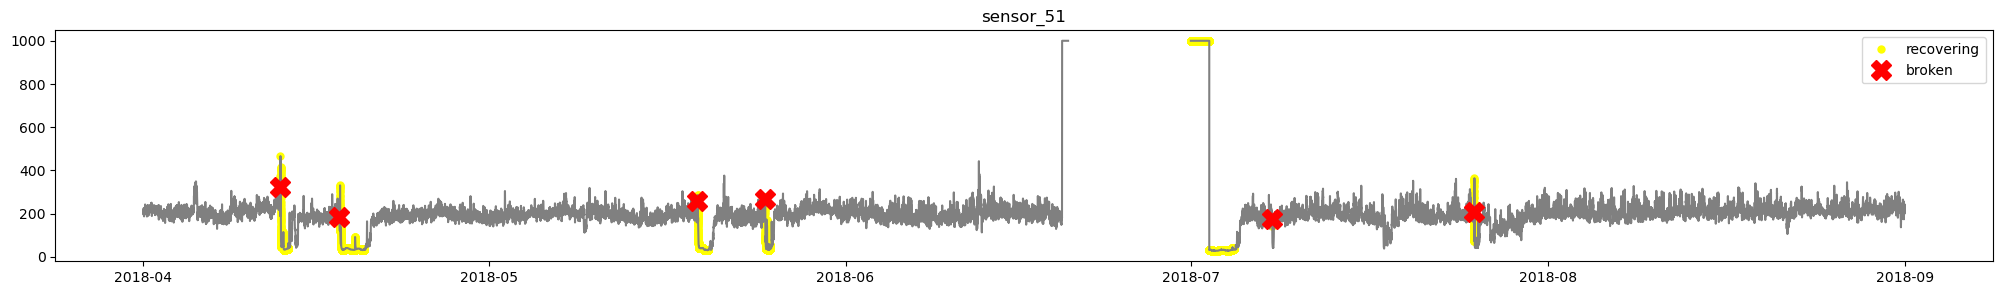

In [11]:
# plot sensor 51
plot_sensor('sensor_51')

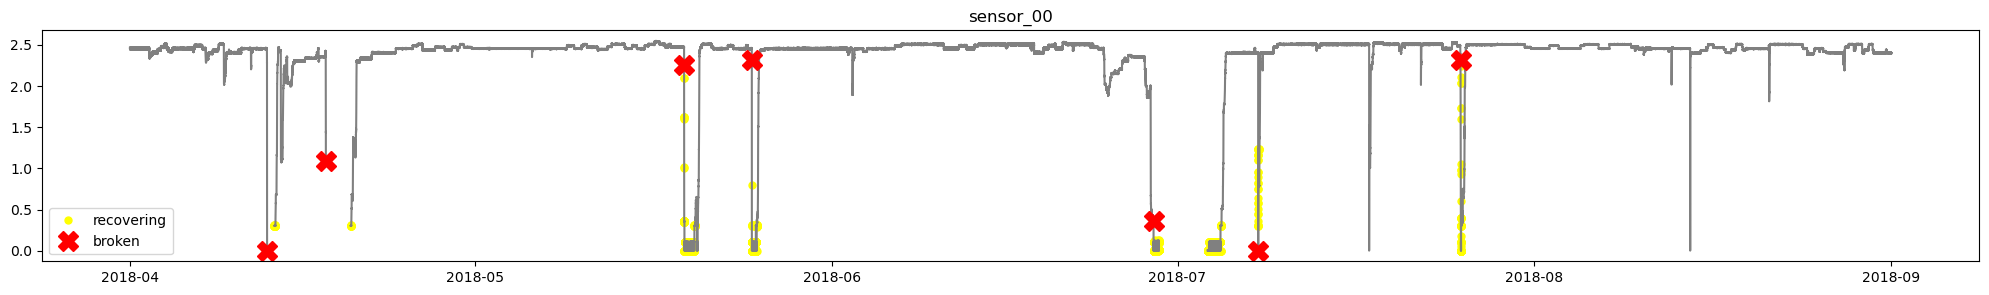

In [12]:
plot_sensor('sensor_00')

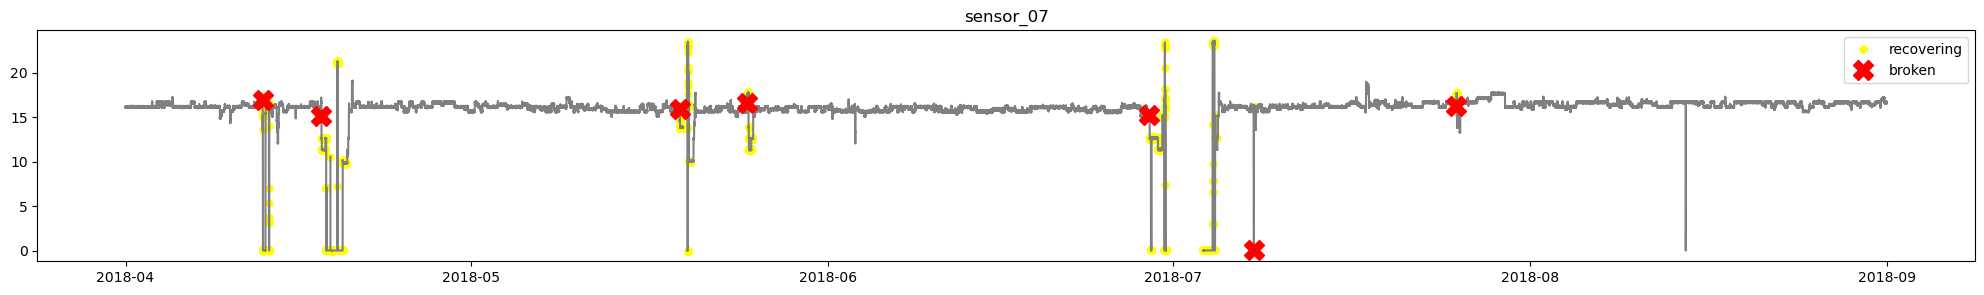

In [13]:
plot_sensor('sensor_07')

### The code used above is taken from: https://github.com/fenna/BFVM23DATASCNC5/blob/main/Study_Cases/Study_Case_Anomaly_Detection.ipynb

In [14]:
# from scipy.stats import zscore
# df_sensor_set["sensor_zscore"] = zscore(["sensor_51"])
# df_sensor_set["outlier"] = df_sensor["sensor_zscore"].apply(lambda x: x == 2.8)
# df_sensor_set[df_sensor_set["outlier"]]

# Preparation for machine learning (Anomaly detection)

In [15]:
# use mean of the column to handle missing values and remove label in feature matrix X
m, n = df_sensor_set.shape
X = df_sensor_set.iloc[:,:n-1] # ignore machine status columns
X = X.fillna(X.mean())
X.shape

(220320, 50)

In [16]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

In [17]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.utils.example import visualize

In [ ]:
# # from pyod.utils.data import generate_data
# from pyod.utils.data import evaluate_print
# from pyod.utils.example import visualize
# train= 300
# test=100
# contaminate = 0.1
# X_train, X_test, y_train, y_test = X(n_train=train, n_test=test, n_features=2,contamination=contaminate,random_state=42)

TypeError: 'numpy.ndarray' object is not callable

In [19]:
X_1 = df_sensor_set.drop('machine_status', axis=1)
y_1= df_sensor_set['machine_status']

In [20]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X_1)

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_1, test_size=0.2, random_state=42)

In [22]:
cname_alg = 'KNN' # the name of the algorithm is K Nearest Neighbors
c = KNN()
c.fit(X_train) #Fit the algorithm
y_trainpred = c.labels_  
y_train_scores = c.decision_scores_  
y_testpred = c.predict(X_test) 
y_test_scores = c.decision_function(X_test)  
print("Training Data:")
print(cname_alg, y_train, y_train_scores)
print("Test Data:")
print(cname_alg, y_test, y_test_scores)
visualize(cname_alg, X_train, y_train, X_test, y_test, y_trainpred,y_testpred, show_figure=True, save_figure=True)

Training Data:
KNN timestamp
2018-04-13 21:59:00        NORMAL
2018-05-28 00:18:00        NORMAL
2018-07-09 00:11:00        NORMAL
2018-06-05 16:27:00        NORMAL
2018-04-23 01:37:00        NORMAL
                          ...    
2018-06-23 05:59:00        NORMAL
2018-06-12 00:14:00        NORMAL
2018-07-01 14:52:00    RECOVERING
2018-07-11 23:47:00        NORMAL
2018-06-24 16:38:00        NORMAL
Name: machine_status, Length: 176256, dtype: object [55.24911509 53.73566025 46.61659403 ... 46.39618092 49.98862606
 56.77307965]
Test Data:
KNN timestamp
2018-06-15 02:25:00        NORMAL
2018-08-08 00:59:00        NORMAL
2018-07-14 14:48:00        NORMAL
2018-08-29 14:38:00        NORMAL
2018-08-17 18:13:00        NORMAL
                          ...    
2018-05-21 05:49:00        NORMAL
2018-07-02 09:11:00    RECOVERING
2018-06-07 15:14:00        NORMAL
2018-05-12 06:29:00        NORMAL
2018-07-19 10:43:00        NORMAL
Name: machine_status, Length: 44064, dtype: object [ 37.84001545  7

ValueError: Input data has to be 2-d for visualization. The input data has (176256, 50).

In [ ]:
scale = StandardScaler()
fage = scale.fit_transform(X)
# fage = pd.DataFrame(fage, columns = ["sensor_00", "sensor_51"])
# fage.plot.scatter(x = "sensor_00", y = "sensor_51")

In [ ]:
from sklearn.cluster import DBSCAN
outlier = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier.fit_predict(X)
clusters 


array([   -1,    -1,    -1, ..., 16516, 16516, 16516], dtype=int64)

In [ ]:
value=-1
index = clusters.argmin()
print(" The element is at ", index)
small_num = np.min(clusters)
print("The small number is : " , small_num)
print(np.where(clusters == small_num))

 The element is at  0
The small number is :  -1
(array([     0,      1,      2, ..., 220311, 220312, 220313], dtype=int64),)


In [ ]:
# from matplotlib import cm
# c = cm.get_cmap('magma_r')
# fage.plot.scatter(
#   x = "sensor_51",
#   y = "sensor_00",
#   c = clusters,
#   cmap = c,
#   colorbar = True
# )

In [ ]:
import prophet
from prophet import forecaster
from prophet import Prophet
m = Prophet()

In [ ]:
# Create a DataFrame with column names
df_sensor_set_1 = pd.DataFrame(columns=['machine_status', 'sensor_51', 'sensor_00', 'sensor_07'])

# Perform the operation on the 'sensor_51', 'sensor_00', and 'sensor_07' columns
df_sensor_set_1[['sensor_51', 'sensor_00', 'sensor_07']] = np.where(
    (df_sensor_set_1[['sensor_51', 'sensor_00', 'sensor_07']] != 0),
    np.log(df_sensor_set_1[['sensor_51', 'sensor_00', 'sensor_07']]),
    0
)

In [ ]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

In [ ]:
# train an ECOD detector
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(X_train)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores on the train data
y_test_scores = clf.decision_function(X_test)  # predict raw outlier scores on test

In [ ]:
# train ECOD detector
clf_name = 'ECOD'
clf = ECOD()

In [ ]:
 # you could try parallel version as well.
# clf = ECOD(n_jobs=2)
clf.fit(X_train)

ECOD(contamination=0.1, n_jobs=1)

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [ ]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


In [ ]:
# evaluate and print the results
from pyod.utils.data import evaluate_print
print("\nOn Training Data:")
print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
print(clf_name, y_test, y_test_scores)



On Training Data:
ECOD timestamp
2018-04-13 21:59:00        NORMAL
2018-05-28 00:18:00        NORMAL
2018-07-09 00:11:00        NORMAL
2018-06-05 16:27:00        NORMAL
2018-04-23 01:37:00        NORMAL
                          ...    
2018-06-23 05:59:00        NORMAL
2018-06-12 00:14:00        NORMAL
2018-07-01 14:52:00    RECOVERING
2018-07-11 23:47:00        NORMAL
2018-06-24 16:38:00        NORMAL
Name: machine_status, Length: 176256, dtype: object [ 75.18035609  68.90515003  72.17806542 ... 123.05246456  76.55529831
  81.76438229]

On Test Data:
ECOD timestamp
2018-06-15 02:25:00        NORMAL
2018-08-08 00:59:00        NORMAL
2018-07-14 14:48:00        NORMAL
2018-08-29 14:38:00        NORMAL
2018-08-17 18:13:00        NORMAL
                          ...    
2018-05-21 05:49:00        NORMAL
2018-07-02 09:11:00    RECOVERING
2018-06-07 15:14:00        NORMAL
2018-05-12 06:29:00        NORMAL
2018-07-19 10:43:00        NORMAL
Name: machine_status, Length: 44064, dtype: object 

### The code above was taken from: https://github.com/yzhao062/pyod/blob/master/examples/ecod_example.py

In [ ]:
################### Train Isolation Forest #################
from sklearn.ensemble import IsolationForest
model  = IsolationForest(n_estimators=50, max_samples=500, contamination=.01, max_features=2, 
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(X_imputed)
# Get Anomaly Scores and Predictions
anomaly_score = model.decision_function(X_imputed)
predictions = model.predict(X_imputed)

In [ ]:
######### Visualize Anomaly scores and Anomaly Status ########
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(X_imputed['sensor_51'], X_imputed['sensor_00'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('sensor 51', fontsize = 16)
plt.ylabel('sensor 00', fontsize = 16)
plt.grid()
# To Plot Predictions
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(X_imputed['sensor_51'], X_imputed['sensor_00'], c = predictions, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel(' sensor 51', fontsize = 16)
plt.ylabel('sensor 00', fontsize = 16)
plt.grid()
plt.title('Contamination = 0.01', weight = 'bold')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1500x900 with 0 Axes>

In [ ]:
my_array_sensor = np.array(X_imputed)
print(my_array_sensor)

[[  2.465394    47.09201     53.2118     ... 157.9861      67.70834
  201.3889    ]
 [  2.465394    47.09201     53.2118     ... 157.9861      67.70834
  201.3889    ]
 [  2.444734    47.35243     53.2118     ... 155.9606      67.12963
  203.7037    ]
 ...
 [  2.396528    47.69964981  50.52083    ... 217.3032     155.3819
  232.0602    ]
 [  2.406366    47.69964981  50.52083206 ... 222.5116     153.9352
  234.0856    ]
 [  2.396528    47.69964981  50.52083206 ... 227.4306     150.463
  234.0856    ]]


In [ ]:
# Create the Isolation Forest model
model = IsolationForest(n_estimators=50, max_samples=500, contamination=0.01, random_state=1)

# Fit the model on your data
model.fit(my_array_sensor)

# Obtain anomaly scores and predictions
anomaly_score = model.decision_function(my_array_sensor)
predictions = model.predict(my_array_sensor)

# Visualize anomaly scores using scatter plot
plt.figure(figsize=(10, 6), dpi=150)
s = plt.scatter(my_array_sensor['sensor_51'], my_array_sensor['sensor_00'], c=anomaly_score, cmap='coolwarm')
plt.colorbar(s, label='More Negative = More Anomalous')
plt.xlabel('sensor 51', fontsize=16)
plt.ylabel('sensor 00', fontsize=16)
plt.grid()
plt.title('Anomaly Scores', weight='bold')
plt.show()

# Visualize predictions using scatter plot
plt.figure(figsize=(10, 6), dpi=150)
s = plt.scatter(my_array_sensor['sensor_51'], my_array_sensor['sensor_00'], c=predictions, cmap='coolwarm')
plt.colorbar(s, label='Anomaly Prediction')
plt.xlabel('sensor 51', fontsize=16)
plt.ylabel('sensor 00', fontsize=16)
plt.grid()
plt.title('Anomaly Predictions', weight='bold')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1500x900 with 0 Axes>

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by OneClassSVM.

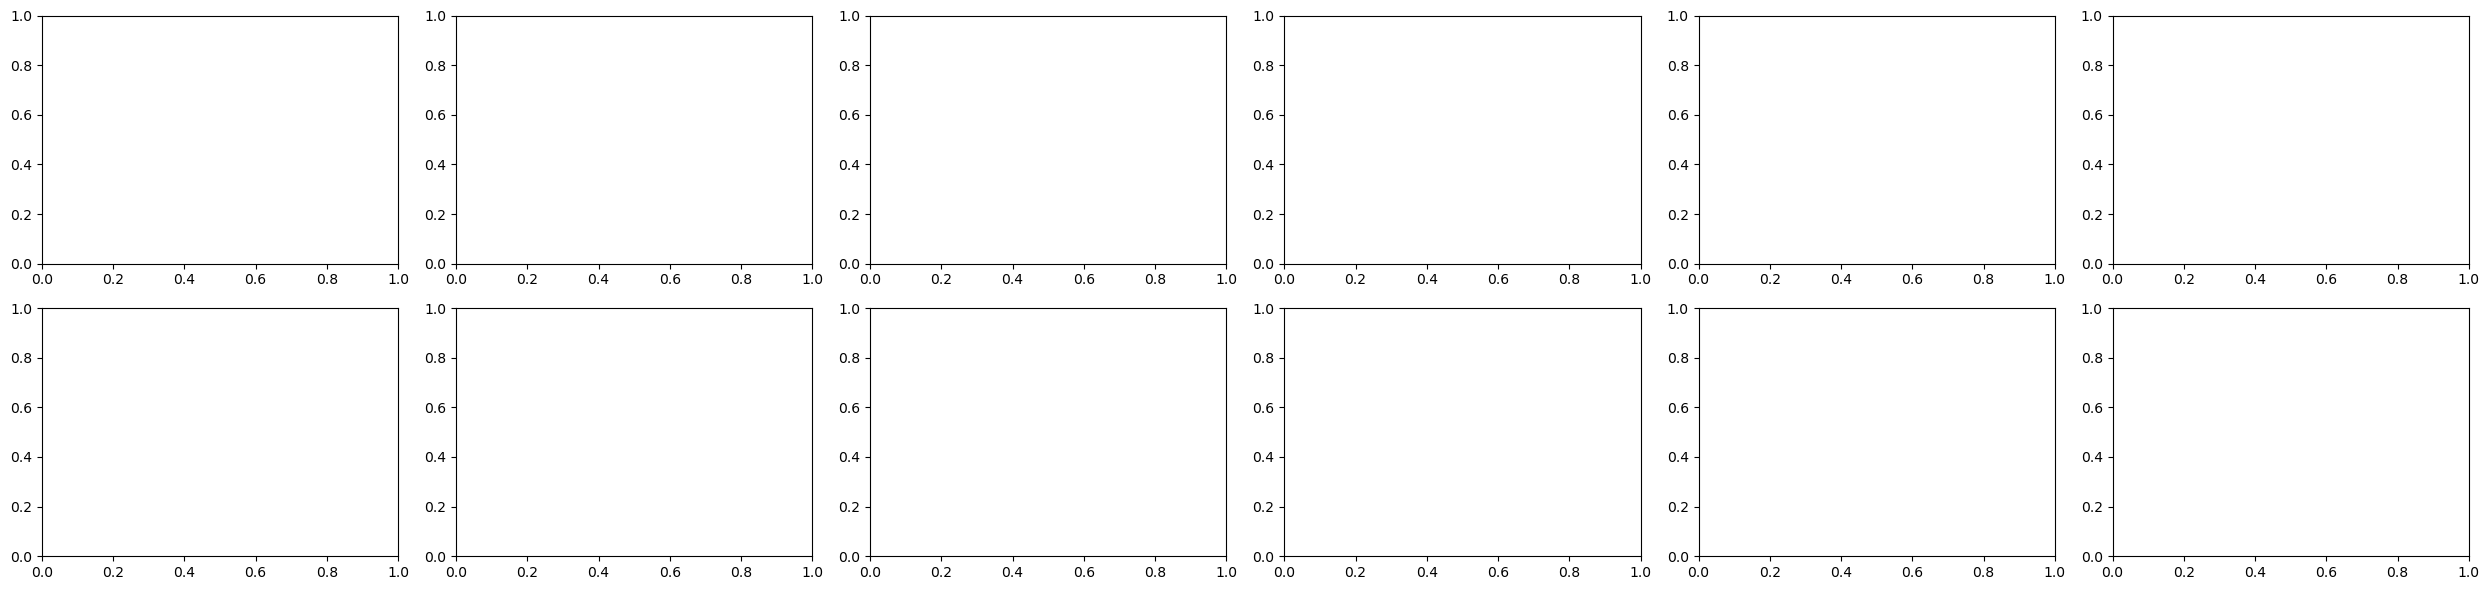

In [ ]:
from sklearn import svm

def plot_anomaly2(data, predicted, ax):
    df_sensor_set['sensor_51'] = predicted
    
    normal = df_sensor_set.loc[df_sensor_set['sensor_51'] == 1, :]
    anomalies = df_sensor_set.loc[df_sensor_set['sensor_51'] == -1, :]
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    anomalies.plot.scatter(column1, column2, color = 'tomato', fontsize = 14,  sharex = False, ax=ax)
    normal.plot.scatter(column1, column2, color = 'grey', fontsize = 14,  sharex = False, ax = ax)
#plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax
# Create Fake data to classify 
x_fake  =  pd.DataFrame(np.random.uniform(-5, 19, (35000, 2)), columns = ['Var 1', 'Var 2'])
# Visualize effect of changing Gamma
gammas = [.00005, .005, .01, .025, .05, .1,.3, .6, .9, 2, 5, 10]
fig, axes = plt.subplots(2, 6, figsize = (25, 6), tight_layout = True)
for i, ax in zip(range(len(gammas)), axes.flatten()):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(df_sensor_set)
model_predictions = model.predict(x_fake)
    #x_fake['Predictions'] = model_predictions
ax = plot_anomaly2(x_fake, model_predictions,ax)
ax.scatter(df_sensor_set.iloc[:, 0], df_sensor_set.iloc[:, 1], color = 'k', s = 10)
ax.set_title('Gamma: {}'.format(np.around(gamma,6)), weight = 'bold', fontsize = 14)

### the code used above is taken from: https://towardsdatascience.com/anomaly-detection-in-python-part-2-multivariate-unsupervised-methods-and-code-b311a63f298b